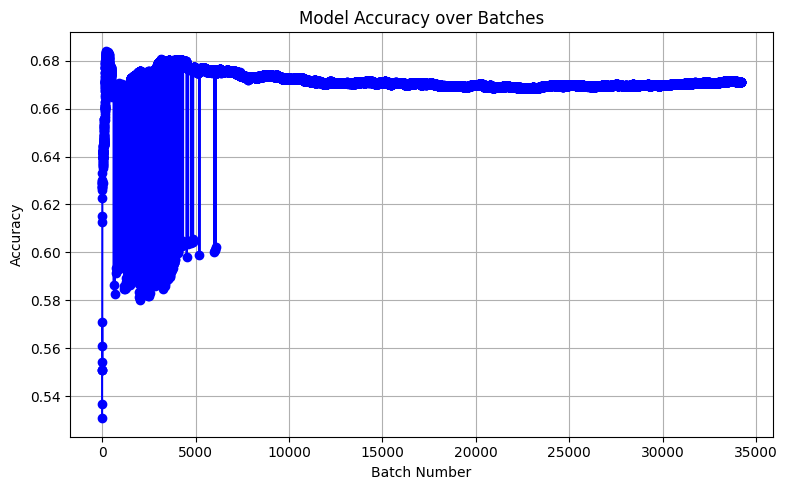

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from src.models import NaiveBayesModel,LogisticRegressionModel

# ---- Assume NaiveBayesModel is already implemented and imported ---- #
# from naive_bayes_model import NaiveBayesModel

from sklearn.datasets import fetch_openml
data = fetch_openml("adult", version=2, as_frame=True)
X = data.data.select_dtypes(include=[int, float])  # drop categoricals for simplicity
y = (data.target == ">50K").astype(int)  # binary labels


# # Wrap X and y into (x, y) tuples
def wrap_data(X, y):
    X_list = X.to_numpy().tolist()
    y_list = y.to_numpy().tolist()
    return list(zip(X_list, y_list))

# # Load dataset
# iris = load_breast_cancer()
# X, y = iris.data, iris.target

# # Binary classification only for this simple example
# X = X[y != 2]
# y = y[y != 2]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_data = wrap_data(X_train, y_train)
test_data = wrap_data(X_test, y_test)

# Train model
model = LogisticRegressionModel()
model.fit(train_data, test_data)

# Plot accuracy over iterations
scores = model.get_all_scores()
accuracies = [score['recall'] for score in scores]

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(accuracies)+1), accuracies, marker='o', linestyle='-', color='blue')
plt.title("Model Accuracy over Batches")
plt.xlabel("Batch Number")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
train_data

[(array([4.8, 3.4, 1.6, 0.2]), np.int64(0)),
 (array([4.6, 3.2, 1.4, 0.2]), np.int64(0)),
 (array([6. , 3.4, 4.5, 1.6]), np.int64(1)),
 (array([5.2, 3.4, 1.4, 0.2]), np.int64(0)),
 (array([5. , 2.3, 3.3, 1. ]), np.int64(1)),
 (array([5.4, 3.9, 1.7, 0.4]), np.int64(0)),
 (array([5.6, 3. , 4.5, 1.5]), np.int64(1)),
 (array([6.7, 3.1, 4.4, 1.4]), np.int64(1)),
 (array([5. , 3.2, 1.2, 0.2]), np.int64(0)),
 (array([5.4, 3.9, 1.3, 0.4]), np.int64(0)),
 (array([5. , 3.3, 1.4, 0.2]), np.int64(0)),
 (array([4.9, 3.1, 1.5, 0.2]), np.int64(0)),
 (array([5. , 3.4, 1.5, 0.2]), np.int64(0)),
 (array([5.7, 3. , 4.2, 1.2]), np.int64(1)),
 (array([5.2, 3.5, 1.5, 0.2]), np.int64(0)),
 (array([5.1, 3.8, 1.5, 0.3]), np.int64(0)),
 (array([5.5, 2.4, 3.7, 1. ]), np.int64(1)),
 (array([5. , 3. , 1.6, 0.2]), np.int64(0)),
 (array([6. , 2.2, 4. , 1. ]), np.int64(1)),
 (array([4.3, 3. , 1.1, 0.1]), np.int64(0)),
 (array([4.8, 3.4, 1.9, 0.2]), np.int64(0)),
 (array([4.6, 3.1, 1.5, 0.2]), np.int64(0)),
 (array([5

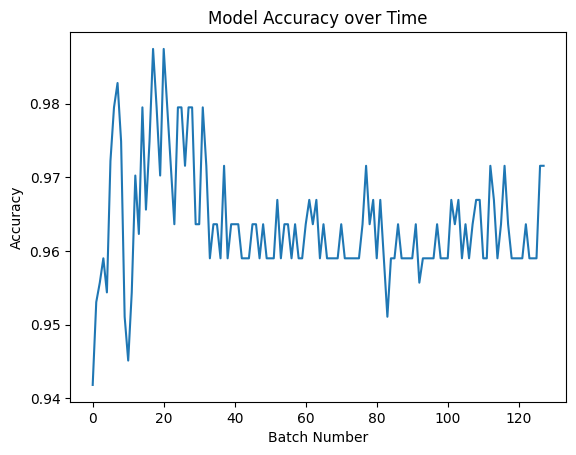

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from src.models import RandomForestClassifierModel
# Load dataset and split into train/test
data = load_breast_cancer()
X = data.data
y = data.target

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create train/test tuples
train = list(zip(X_train, y_train))
test = list(zip(X_test, y_test))

# Initialize and train the model
model = RandomForestClassifierModel(batch_per=0.01)
model.fit(train, test)

# Get the model's performance scores
scores = model.scores

# Display the scores at each batch
import matplotlib.pyplot as plt

accuracies = [score['recall'] for score in scores]

plt.plot(accuracies)
plt.title('Model Accuracy over Time')
plt.xlabel('Batch Number')
plt.ylabel('Accuracy')
plt.show()